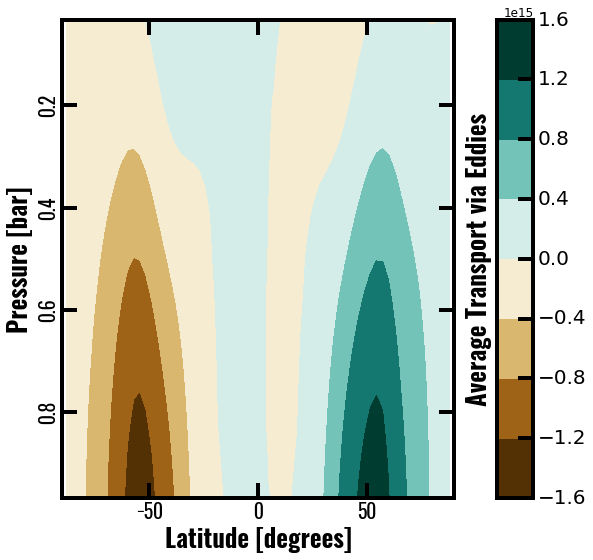

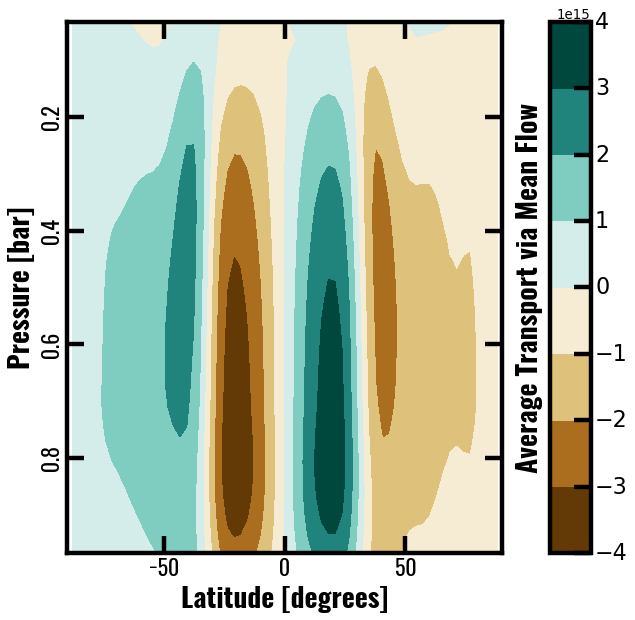

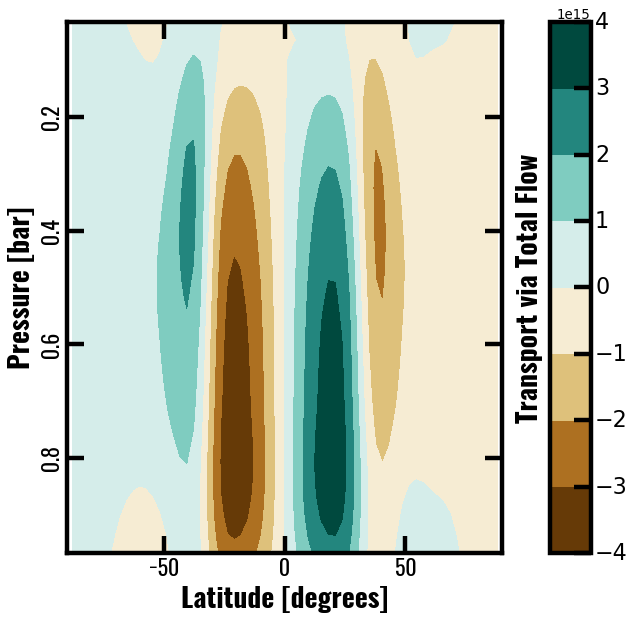

In [57]:
from load_data_noin import load_data
import numpy as np
import pickle
import matplotlib
%matplotlib inline

path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
#runpath='FiducialPlanet_NEW/Model2/P0_95'
runpath='EARTH_T42_tdiss'

oom=0
p0=1.00#9.50
g=9.18#21.8 #m/s^2
R=287.#3779. #J/kg/K
Rp=6.371*10**6. #radius in m
#TGR='base temp for p0' ==0???

lo=True

from altitude_func import altitude
from heat_transport_func import *
from PLOTS_pressurecontour import *


tp=path+runpath
sigma=pickle.load(open(tp+'/pres_lon_lat.txt', 'rb'))[0]/p0
latar=pickle.load(open(tp+'/pres_lon_lat.txt', 'rb'))[2]
lonar=pickle.load(open(tp+'/pres_lon_lat.txt', 'rb'))[1]

if lo==True:
    temps=pickle.load(open(tp+'/TMP_lo.txt', 'rb'))
    vwnd=pickle.load(open(tp+'/VWD_lo.txt', 'rb'))
    surfp=pickle.load(open(tp+'/fort50_lo.txt', 'rb'))
if lo==False:
    temps=pickle.load(open(tp+'/fort26.txt', 'rb'))[:,:,:,5]
    vwnd=pickle.load(open(tp+'/fort26.txt', 'rb'))[:,:,:,4]
    surfp=pickle.load(open(tp+'/fort50.txt', 'rb'))
        
if lo==True:
    data_ed=np.empty([90,len(sigma),len(latar)]) 
    for i in range(0,90):
        data_ed[i,:,:]=viaeddies(temps[i,:,:,:],vwnd[i,:,:,:],surfp[i,:,:,:],sigma,latar,lonar,R,g,p0,oom)
    data_ed_a=np.nanmean(data_ed,axis=0)
    data_mf=viameanfl(np.nanmean(temps,axis=0),np.nanmean(vwnd,axis=0),np.nanmean(surfp,axis=0),sigma,latar,lonar,R,g,p0,oom)
    data_ed_int=vertical_integral(data_ed_a, sigma, p0, g, Rp, latar)
    data_mf_int=vertical_integral(data_mf, sigma, p0, g, Rp, latar)


else:
    data_ed=viaeddies(temps,vwnd,surfp,sigma,latar,lonar,R,g,p0,oom) 
    data_mf=viameanfl(temps,vwnd,surfp,sigma,latar,lonar,R,g,p0,oom)
    data_ed_int=vertical_integral(data_ed, sigma, p0, g, Rp, latar)
    data_mf_int=vertical_integral(data_mf, sigma, p0, g, Rp, latar)

    
    



######################
#########################

if lo==True:
    #contour_presplot(latar,sigma*p0,data_ed[89,:,:],True,'Instantaneous Transport via Eddies',tp+'/HT_viaeddies.png')
    contour_presplot(latar,sigma*p0,data_ed_int,True,'Average Transport via Eddies',tp+'/HT_viaeddies_a.png')
    contour_presplot(latar,sigma*p0,data_mf_int,True,'Average Transport via Mean Flow',tp+'/HT_viameanflw.png')
    contour_presplot(latar,sigma*p0,(data_ed_int+data_mf_int),True,'Transport via Total Flow',tp+'/HT_total.png')

else:
    contour_presplot(latar,sigma*p0,data_ed_int,True,'Instantaneous Transport via Eddies',tp+'/HT_viaeddies.png')
    contour_presplot(latar,sigma*p0,data_mf_int,True,'Average Transport via Mean Flow',tp+'/HT_viameanflw.png')
    contour_presplot(latar,sigma*p0,(data_ed_int+data_mf_int),True,'Transport via Total Flow',tp+'/HT_total.png')


if lo==True:
    pickle.dump(data_ed_a,open(path+runpath+'/HT_eddies_a.txt','wb'))
    
pickle.dump(data_ed,open(path+runpath+'/HT_eddies.txt','wb'))
pickle.dump(data_mf,open(path+runpath+'/HT_meanfl.txt','wb'))

    
pickle.dump(data_ed_int,open(path+runpath+'/HT_eddies_int.txt','wb'))
pickle.dump(data_mf_int,open(path+runpath+'/HT_meanfl_int.txt','wb'))


2.765817208756925 2.650303086735518 2.2537326144331105


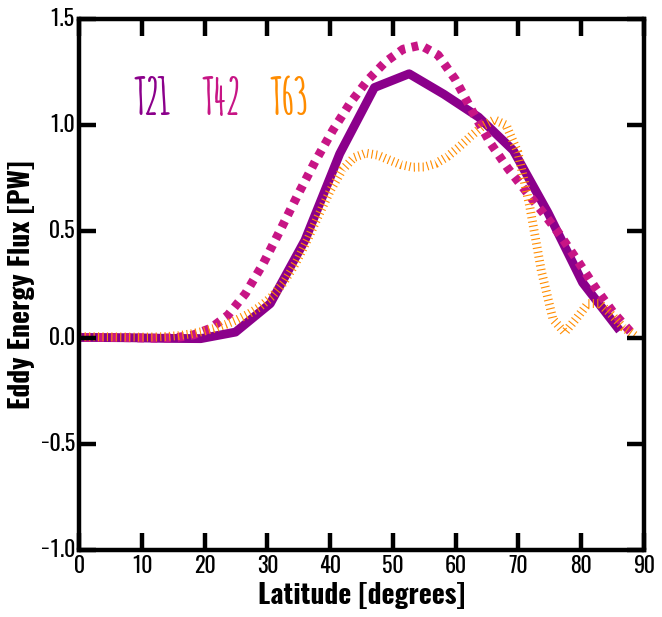

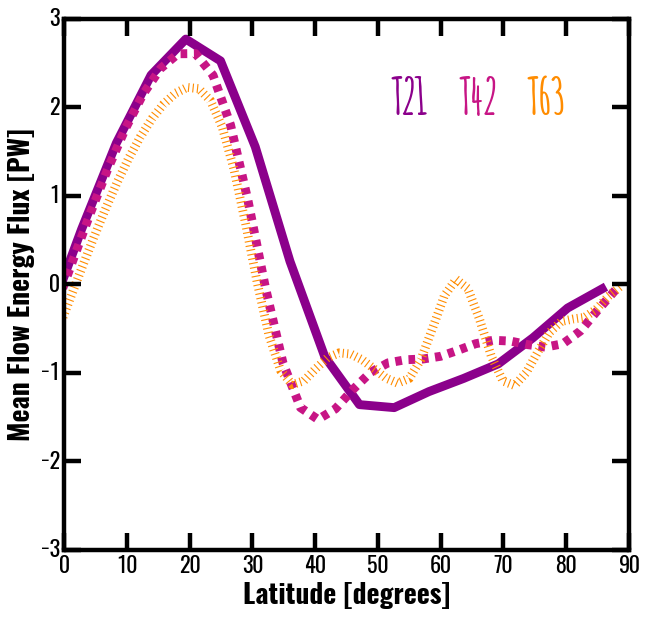

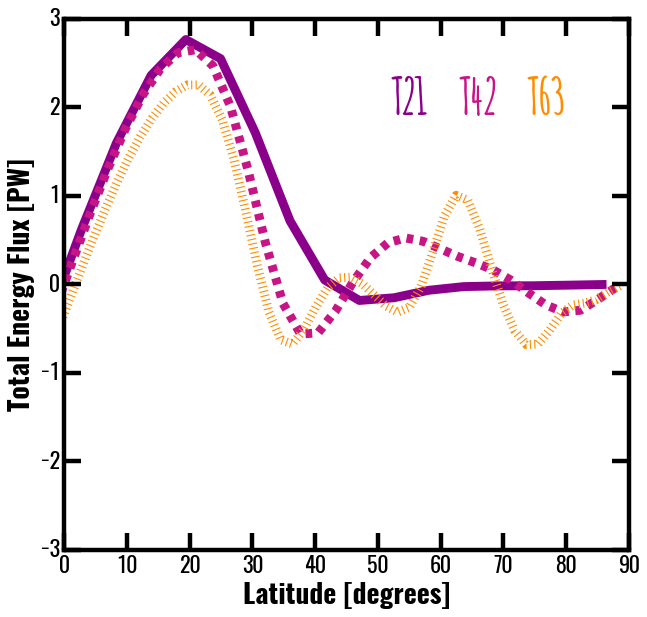

In [60]:
t21_lat=pickle.load(open(path+'EARTH_T21_tdiss/pres_lon_lat.txt', 'rb'))[2]
data_ed_t21=pickle.load(open(path+'EARTH_T21_tdiss/HT_eddies_int.txt', 'rb'))[-1]
data_mf_t21=pickle.load(open(path+'EARTH_T21_tdiss/HT_meanfl_int.txt', 'rb'))[-1]

t42_lat=pickle.load(open(path+'EARTH_T42_tdiss/pres_lon_lat.txt', 'rb'))[2]
data_ed_t42=pickle.load(open(path+'EARTH_T42_tdiss/HT_eddies_int.txt', 'rb'))[-1]
data_mf_t42=pickle.load(open(path+'EARTH_T42_tdiss/HT_meanfl_int.txt', 'rb'))[-1]

t63_lat=pickle.load(open(path+'EARTH_T63/pres_lon_lat.txt', 'rb'))[2]
data_ed_t63=pickle.load(open(path+'EARTH_T63/HT_eddies_int.txt', 'rb'))[-1]
data_mf_t63=pickle.load(open(path+'EARTH_T63/HT_meanfl_int.txt', 'rb'))[-1]

print np.nanmax(data_mf_t21+data_ed_t21)/10**15,np.nanmax(data_mf_t42+data_ed_t42)/10**15,np.nanmax(data_mf_t63+data_ed_t63)/10**15

########

apath_r=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/AmaticSC-Regular.ttf')
apath_b=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/Amatic-Bold.ttf')
aprop_r=fm.FontProperties(fname=apath_r)
aprop_b=fm.FontProperties(fname=apath_b)

jpath_r=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/JosefinSlab-Regular.ttf')
jpath_sb=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/JosefinSlab-SemiBold.ttf')
jpath_b=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/JosefinSlab-Bold.ttf')
jprop_r=fm.FontProperties(fname=jpath_r)
jprop_sb=fm.FontProperties(fname=jpath_sb)
jprop_b=fm.FontProperties(fname=jpath_b)

#######

fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.12,right=0.95)

plt.style.use('classic')
fig.patch.set_facecolor('none')

rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

plt.plot(t21_lat,data_ed_t21/10**15.,linewidth=8.0,linestyle='-',color='darkmagenta')
plt.plot(t42_lat,data_ed_t42/10**15.,linewidth=8.0,linestyle='--',color='mediumvioletred')
plt.plot(t63_lat,data_ed_t63/10**15.,linewidth=8.0,linestyle=':',color='darkorange')

plt.xlabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(0,90)

plt.ylabel('Eddy Energy Flux [PW]',fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r,
           rotation='horizontal')
plt.ylim(-1,)

plt.figtext(0.2,0.8,'T21',fontsize=45,color='darkmagenta',fontproperties=aprop_b)
plt.figtext(0.3,0.8,'T42',fontsize=45,color='mediumvioletred',fontproperties=aprop_b)
plt.figtext(0.4,0.8,'T63',fontsize=45,color='darkorange',fontproperties=aprop_b)

plt.savefig(path+'EARTH_HT_viaeddies_lat_tdiss.png')


######################

fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.12,right=0.95)

plt.style.use('classic')
fig.patch.set_facecolor('none')

rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

plt.plot(t21_lat,data_mf_t21/10**15.,linewidth=8.0,linestyle='-',color='darkmagenta')
plt.plot(t42_lat,data_mf_t42/10**15.,linewidth=8.0,linestyle='--',color='mediumvioletred')
plt.plot(t63_lat,data_mf_t63/10**15.,linewidth=8.0,linestyle=':',color='darkorange')

plt.xlabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(0,90)

plt.ylabel('Mean Flow Energy Flux [PW]',fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r,
           rotation='horizontal')
#plt.ylim(-5,5)

plt.figtext(0.6,0.8,'T21',fontsize=45,color='darkmagenta',fontproperties=aprop_b)
plt.figtext(0.7,0.8,'T42',fontsize=45,color='mediumvioletred',fontproperties=aprop_b)
plt.figtext(0.8,0.8,'T63',fontsize=45,color='darkorange',fontproperties=aprop_b)

plt.savefig(path+'EARTH_HT_viameanflow_lat_tdiss.png')
    
######################

fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.12,right=0.95)

plt.style.use('classic')
fig.patch.set_facecolor('none')

rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

plt.plot(t21_lat,(data_mf_t21+data_ed_t21)/10**15.,linewidth=8.0,linestyle='-',color='darkmagenta')
plt.plot(t42_lat,(data_mf_t42+data_ed_t42)/10**15.,linewidth=8.0,linestyle='--',color='mediumvioletred')
plt.plot(t63_lat,(data_mf_t63+data_ed_t63)/10**15.,linewidth=8.0,linestyle=':',color='darkorange')

plt.xlabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(0,90)

plt.ylabel('Total Energy Flux [PW]',fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r,
           rotation='horizontal')
#plt.ylim(-5,5)

plt.figtext(0.6,0.8,'T21',fontsize=45,color='darkmagenta',fontproperties=aprop_b)
plt.figtext(0.7,0.8,'T42',fontsize=45,color='mediumvioletred',fontproperties=aprop_b)
plt.figtext(0.8,0.8,'T63',fontsize=45,color='darkorange',fontproperties=aprop_b)

plt.savefig(path+'EARTH_HT_total_lat_tdiss.png')

    

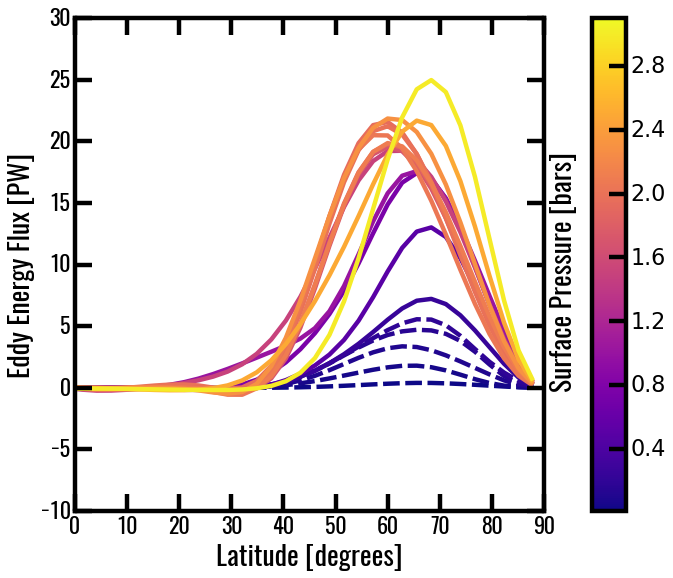

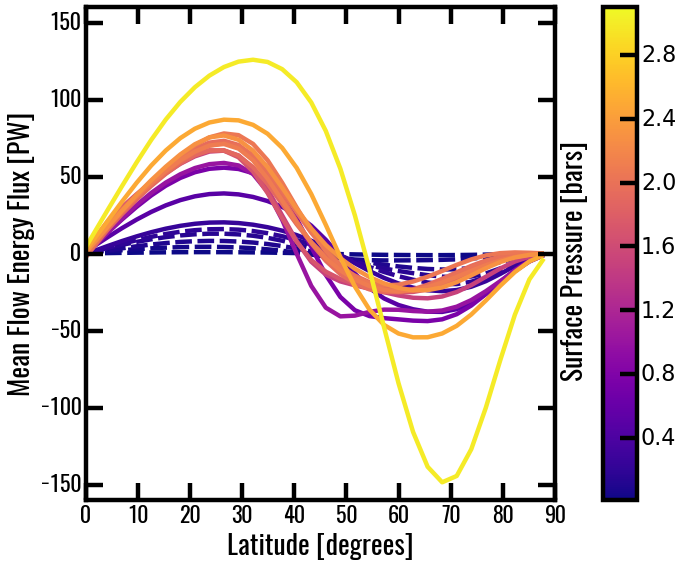

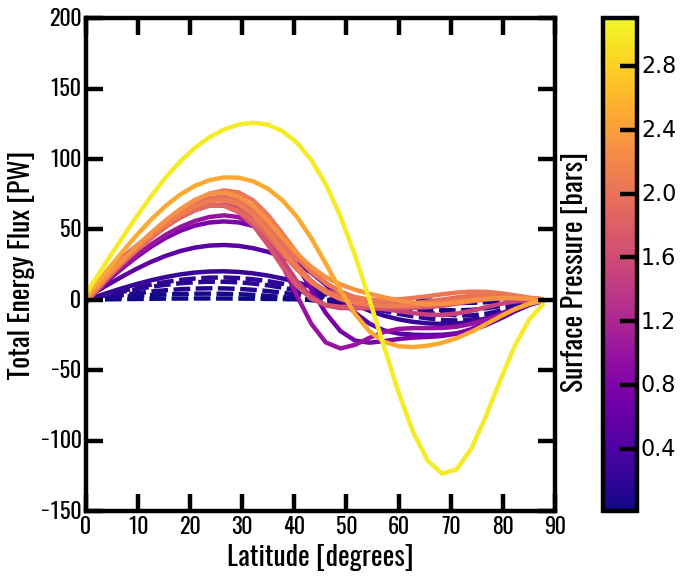

In [55]:
path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'

runpath4='FiducialPlanet_NEW/Model4/'#L10/T42/'
runpath3='FiducialPlanet_NEW/Model3/'#L10/T42/'
runpath2='FiducialPlanet_NEW/Model2/'#L10/T42/'
runpath1='FiducialPlanet_NEW/Model1/'#L10/T42/'


runs4_n=np.array(['P0_001','P0_005','P0_010','P0_015','P0_020'])
runs3_n=np.array(['P0_025','P0_050','P0_075','P0_100','P0_150',
                  'P0_170','P0_190','P0_195','P0_200','P0_205',
                  'P0_210','P0_230','P0_250','P0_300'])
runs2_n=np.array(['P0_4','P0_5','P0_6','P0_7','P0_8','P0_9','P0_95'])


runs4_l=['0.01 bars','0.05 bars','0.10 bars', '0.15 bars','0.20 bars']
runs3_l=['0.25 bars','0.50 bars','0.75 bars', '1.00 bars','1.50 bars',
         '1.70 bars','1.90 bars','1.95 bars','2.00 bars','2.05 bars',
         '2.10 bars', '2.30 bars','2.50 bars','3.00 bars']
runs2_l=['4.00 bars','5.00 bars','6.00 bars', '7.00 bars','8.00 bars','9.00 bars','9.50 bars']


surfp_4=np.array([0.01,0.05,0.10,0.15,0.20])
surfp_3=np.array([0.25,0.50,0.75,1.00,1.50,
                   1.70,1.90,1.95,2.0,2.05,
                   2.10,2.30,2.50,3.00])
surfp_2=np.array([4.,5.,6.,7.,8.,9.,9.5])

#######################
t_names = np.concatenate((runs4_n,runs3_n,runs2_n),axis=0)
t_label = np.concatenate((runs4_l,runs3_l,runs2_l),axis=0)
t_surfp = np.concatenate((surfp_4,surfp_3,surfp_2),axis=0)

########

norm=matplotlib.colors.Normalize(vmin=np.nanmin(t_surfp),vmax=np.nanmax(3.1))
colors=matplotlib.cm.plasma
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])

#####

fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.16,top=0.93,left=0.13,right=0.82)

plt.style.use('classic')
fig.patch.set_facecolor('none')

rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

for ri,r in enumerate(t_names):
    if t_surfp[ri]<0.23:
        tp=path+runpath4+str(r)
        ls='--'
        dashes=[15, 5, 15, 5]
    if t_surfp[ri]>0.23 and t_surfp[ri]<3.1:
        tp=path+runpath3+str(r)
        ls='-'
        dashes=[10, 0, 10, 0]
    if t_surfp[ri]>3.1:
        continue
        tp=path+runpath2+str(r)
        ls='-'
        dashes=[5, 5, 10, 5]
        
    latar=pickle.load(open(tp+'/pres_lon_lat.txt', 'rb'))[2]
    data_ed=pickle.load(open(tp+'/HT_eddies_int.txt', 'rb'))[-1]
    plt.plot(latar,data_ed/10**15.,linewidth=4.0,color=scal_m.to_rgba(t_surfp[ri]),linestyle=ls,dashes=dashes)
    

plt.xlabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_r)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(0,90)

plt.ylabel('Eddy Energy Flux [PW]',fontsize=25,fontproperties=oprop_r)
plt.yticks(fontsize=20,fontproperties=oprop_r,
           rotation='horizontal')
plt.ylim(-10,30)

plt.figtext(0.829,0.83/2.+0.12,'Surface Pressure [bars]',fontsize=25,fontproperties=oprop_r,rotation='vertical',va='center')


cbaxes = fig.add_axes([0.89,0.16,0.05,0.93-0.16])
cb = plt.colorbar(scal_m, cax=cbaxes)
cb.ax.tick_params(labelsize=20) 

plt.savefig(path+'SurfModels_HT_viaeddies_lat.png')

##########

fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.16,top=0.93,left=0.13,right=0.82)

plt.style.use('classic')
fig.patch.set_facecolor('none')

rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

for ri,r in enumerate(t_names):
    if t_surfp[ri]<0.23:
        tp=path+runpath4+str(r)
        ls='--'
        dashes=[15, 5, 15, 5]
    if t_surfp[ri]>0.23 and t_surfp[ri]<3.1:
        tp=path+runpath3+str(r)
        ls='-'
        dashes=[10, 0, 10, 0]
    if t_surfp[ri]>3.1:
        continue
        tp=path+runpath2+str(r)
        ls='-'
        dashes=[5, 5, 10, 5]
        
    latar=pickle.load(open(tp+'/pres_lon_lat.txt', 'rb'))[2]
    data_mf=pickle.load(open(tp+'/HT_meanfl_int.txt', 'rb'))[-1]
    plt.plot(latar,data_mf/10**15.,linewidth=4.0,color=scal_m.to_rgba(t_surfp[ri]),linestyle=ls,dashes=dashes)

plt.xlabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_r)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(0,90)

plt.ylabel('Mean Flow Energy Flux [PW]',fontsize=25,fontproperties=oprop_r)
plt.yticks(fontsize=20,fontproperties=oprop_r,
           rotation='horizontal')
plt.ylim(-160,160)

plt.figtext(0.829,0.83/2.+0.12,'Surface Pressure [bars]',fontsize=25,fontproperties=oprop_r,rotation='vertical',va='center')

cbaxes = fig.add_axes([0.89,0.16,0.05,0.93-0.16])
cb = plt.colorbar(scal_m, cax=cbaxes)
cb.ax.tick_params(labelsize=20) 

plt.savefig(path+'SurfModels_HT_viameanflow_lat.png')
                
                
#######
         
fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.16,top=0.93,left=0.13,right=0.82)

plt.style.use('classic')
fig.patch.set_facecolor('none')

rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

for ri,r in enumerate(t_names):
    if t_surfp[ri]<0.23:
        tp=path+runpath4+str(r)
        ls='--'
        dashes=[15, 5, 15, 5]
    if t_surfp[ri]>0.23 and t_surfp[ri]<3.1:
        tp=path+runpath3+str(r)
        ls='-'
        dashes=[10, 0, 10, 0]
    if t_surfp[ri]>3.1:
        continue
        tp=path+runpath2+str(r)
        ls='-'
        dashes=[5, 5, 10, 5]
        
    latar=pickle.load(open(tp+'/pres_lon_lat.txt', 'rb'))[2]
    data_ed=pickle.load(open(tp+'/HT_eddies_int.txt', 'rb'))[-1]
    data_mf=pickle.load(open(tp+'/HT_meanfl_int.txt', 'rb'))[-1]
    plt.plot(latar,(data_ed+data_mf)/10**15.,linewidth=4.0,color=scal_m.to_rgba(t_surfp[ri]),linestyle=ls,dashes=dashes)
    

plt.xlabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_r)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(0,90)

plt.ylabel('Total Energy Flux [PW]',fontsize=25,fontproperties=oprop_r)
plt.yticks(fontsize=20,fontproperties=oprop_r,
           rotation='horizontal')
#plt.ylim(-10,30)

plt.figtext(0.829,0.83/2.+0.12,'Surface Pressure [bars]',fontsize=25,fontproperties=oprop_r,rotation='vertical',va='center')


cbaxes = fig.add_axes([0.89,0.16,0.05,0.93-0.16])
cb = plt.colorbar(scal_m, cax=cbaxes)
cb.ax.tick_params(labelsize=20) 


plt.savefig(path+'SurfModels_HT_total_lat.png')

In [29]:
1.5*6.37*10**6

9555000.0